In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def pdf_max_distance(n,a = 0,b = 1,N = 100000, array = 0):
    
    #Function simulates a distribution for the maximum distance between n many points placed randomly on a 1D interval [a,b].

    
    # INPUT:
    # 'n' : number of squirrels running around (or placed) on the interval 
    # 'a' : left endpoint
    # 'b' : right endpoint
    # 'N' : number of simulations to run to populate distribution
    # 'array' : if 0 then returns array simulation for 'n', if 1 then returns matrix simulation up to and including n
    
    #OUTPUT:
    # 'Dmaxs' : array of N simulations for maximum length from all points to adjacent points including endpoints
    
    if array == 0:
        
        Dmaxs = np.empty(N)

        for k in range(N):
            x = np.array([a])
            x = np.append(x, np.sort(np.random.rand(n)))
            x = np.append(x,b)
            
            Dx = x[1:] - x[:-1]
            
            Dmax = np.amax(Dx)
            
            Dmaxs[k] = Dmax
            
        return Dmaxs
    
    elif array == 1:
        
        num = n
        Dmaxs = np.empty([num,N])

        for n in range(1,num+1):
            
            for k in range(N):
                x = np.array([a])
                x = np.append(x, np.sort(np.random.rand(n)))
                x = np.append(x,b)

                Dx = x[1:] - x[:-1]
        
                Dmax = np.amax(Dx)
                
                Dmaxs[n-1][k] = Dmax
                
        return Dmaxs
    
    else:
        print("'array' input not recognized")

In [3]:
def max_pdf(Dmaxs, position = 1):
    
    # INPUT:
    # 'Dmaxs' : array of N values in distribution
    
    # OUTPUT:
    # 'max_prob' : 
    #     if position is 1: returns bin position of maximum pdf
    #     if position is 0: returns the number of occurences of the max pdf 
    
    S = np.shape(Dmaxs)
    if np.size(S) == 1:
        N = S[0]
    else:
        N = S[1]
    
    max_prob = np.histogram(Dmaxs,bins = np.sqrt(N).astype(int))
    max_ind = np.argmax(max_prob[0])
    
    if position == 1:
        return max_prob[1][max_ind]
        
    elif position == 0:
        return max_prob[0][max_ind]
    
    else:
        print("'position' input not recognized")

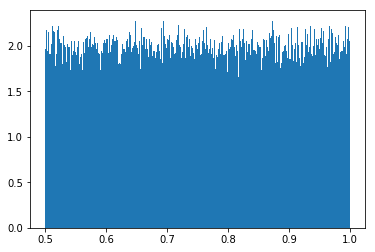

In [13]:
Dmaxs = pdf_max_distance(1, N = 100000)
N = np.size(Dmaxs)
plt.hist(Dmaxs, bins = np.sqrt(N).astype(int), density = 'True')
plt.show()

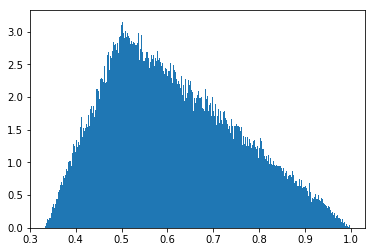

In [6]:
Dmaxs = pdf_max_distance(2, N = 100000)
N = np.size(Dmaxs)
plt.hist(Dmaxs, bins = np.sqrt(N).astype(int), density = 'True')
plt.show()

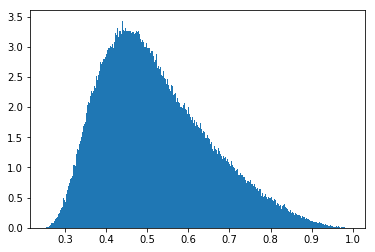

In [10]:
Dmaxs = pdf_max_distance(3, N = 1000000)
N = np.size(Dmaxs)
plt.hist(Dmaxs, bins = np.sqrt(N).astype(int), density = 'True')
plt.show()

In [5]:
Dmaxs = pdf_max_distance(4, N = 1000000)

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


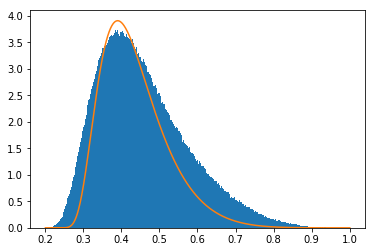

In [19]:
plt.hist(Dmaxs, bins = np.sqrt(N).astype(int), density = 'True')
m = 4
h = 1/(m+1)
a =(.4-h)/m
A =1/(np.math.factorial(m)*a)
X = np.linspace(h,1,1000)
plt.plot(X, A*((1/(X-h)-(1+1/m))**m)*np.exp(-(1/(X-h)-(1+1/m))))

In [ ]:
N = np.size(Dmaxs)
bin, value = np.histogram(Dmaxs,bins = np.sqrt(N).astype(int), density = 'True') 

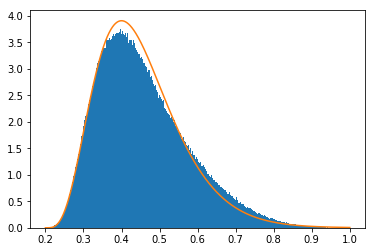

In [22]:
plt.hist(Dmaxs, bins = np.sqrt(N).astype(int), density = 'True')
m = 4
h = 1/(m+1)
a =(.4-h)/m
A =1/(np.math.factorial(m)*a)
X = np.linspace(h,1,1000) 
plt.plot(X, A*(((X-h)/a)**m)*np.exp(-(X-h)/a))

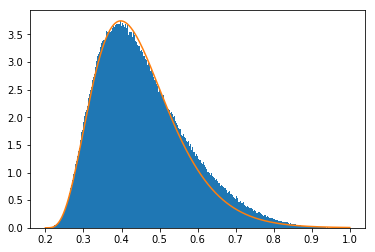

In [27]:
plt.hist(Dmaxs, bins = np.sqrt(N).astype(int), density = 'False')
m = 4
h = 1/(m+1)
a =(.4-h)/m
A =1/(np.math.factorial(m)*a)
X = np.linspace(h,1,1000) 
plt.plot(X, A*(((X-h)/a)**m)*2.748**(-1*(X-h)/a))

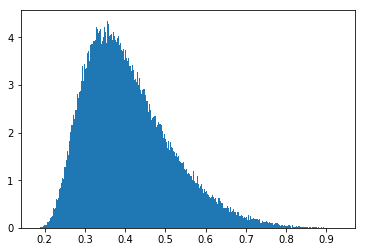

In [7]:
Dmaxs = pdf_max_distance(5, N = 100000)
N = np.size(Dmaxs)
plt.hist(Dmaxs, bins = np.sqrt(N).astype(int), density = 'True')
plt.show()

In [11]:
number = 50
many = 10
Max_Mat = np.zeros([number,many])

for i in range(number):
    for j in  range(many):
        Max_Mat[i][j] = max_pdf(pdf_max_distance(i, N = 100000))

mean = np.zeros(number)
for j in range(number):
    mean[j] = np.mean(Max_Mat[j])
    
mean 

array([1.        , 0.80664668, 0.51154998, 0.44542362, 0.39245755,
       0.34871488, 0.31786188, 0.29098622, 0.2719922 , 0.24913279,
       0.23276683, 0.21926377, 0.20930777, 0.19982976, 0.19203928,
       0.1777988 , 0.1750919 , 0.16623992, 0.15702474, 0.15526878,
       0.15025748, 0.14462562, 0.138745  , 0.13527613, 0.1310047 ,
       0.12892895, 0.1246148 , 0.12069214, 0.11762739, 0.11685767,
       0.11288218, 0.10971053, 0.10733383, 0.10686628, 0.10358601,
       0.10103468, 0.09973756, 0.09842715, 0.09543604, 0.09276276,
       0.090886  , 0.09047465, 0.08733774, 0.08614619, 0.08489281,
       0.0842848 , 0.0813304 , 0.08152289, 0.08038734, 0.07959174])

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


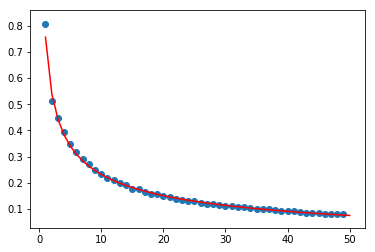

In [12]:
plt.scatter(range(1,number), mean[1:])

a_1 = -.430302
b_1 = .844842
c_1 = -.0816661
X = np.linspace(0,50)
Y = b_1*(X**a_1) + c_1

plt.plot(X, Y, color = 'r')
#plt.plot(X, Y, color = 'c')

In [89]:
np.savetxt("foo.csv", mean.astype(float), delimiter=",")